Accuracy: 0.6948


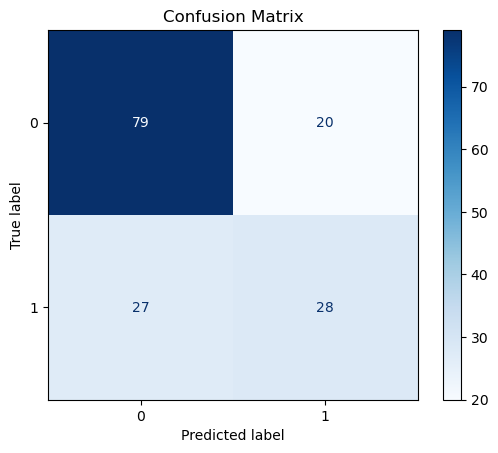

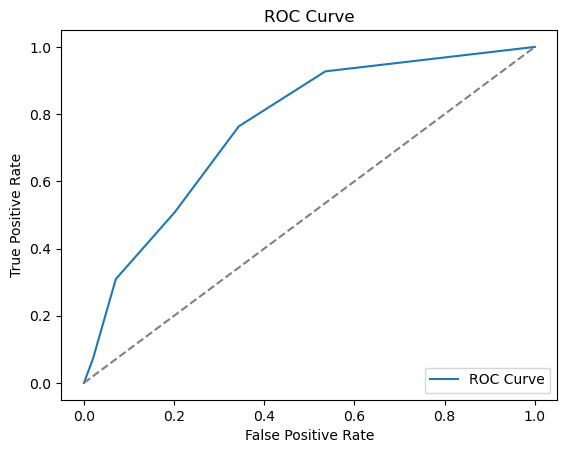

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay, accuracy_score
import os

#Load dataset
url="https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
df=pd.read_csv(url)

#Features and target
X=df.drop('Outcome', axis=1)
y=df['Outcome']

#Split data
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

# Train KNN
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict
y_pred=knn.predict(X_test_scaled)
y_prob=knn.predict_proba(X_test_scaled)[:, 1]

# Accuracy
acc=accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

# Create folder to save images
if not os.path.exists('images'):
    os.makedirs('images')

# Confusion Matrix
cm=confusion_matrix(y_test, y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.savefig('images/confusion_matrix.png')
plt.show()

# ROC Curve
fpr, tpr, thresholds=roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.savefig('images/roc_curve.png')
plt.show()